# 01 — Margin Waterfall & Drivers (Synthetic)

- Load synthetic members + transactions
- Compute contribution margin by segment/tier
- Create a driver view (revenue, variable cost, partner fee)

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Establish path to root directory
sys.path.append(os.path.abspath(os.path.join('..')))

# 2. Import custom quantitative modules
from src.analysis_margin import load_data, compute_contribution_margin

# 3. Extract synthetic data and compute margins
members, txns = load_data('../data/synthetic/members.csv', '../data/synthetic/concierge_transactions.csv')
summary = compute_contribution_margin(members, txns)

In [2]:
# Isolate primary margin drivers for executive review
driver = summary[['segment', 'tier', 'revenue', 'variable_cost', 'partner_fee', 'contribution', 'contribution_margin_pct']]
driver.head()

,segment,tier,revenue,variable_cost,partner_fee,contribution,contribution_margin_pct
0,CapitalOneConcierge,Plus,64363.53,35176.16,4028.09,25159.28,0.390893
1,CapitalOneConcierge,Premium,20135.12,10567.18,1074.90,8493.04,0.421802
2,CapitalOneConcierge,Standard,93108.39,53064.78,6748.44,33295.17,0.357596
3,VelocityBlack,Plus,66414.79,33051.84,3780.19,29582.76,0.445424
4,VelocityBlack,Premium,49333.33,23752.02,2402.33,23178.98,0.469844


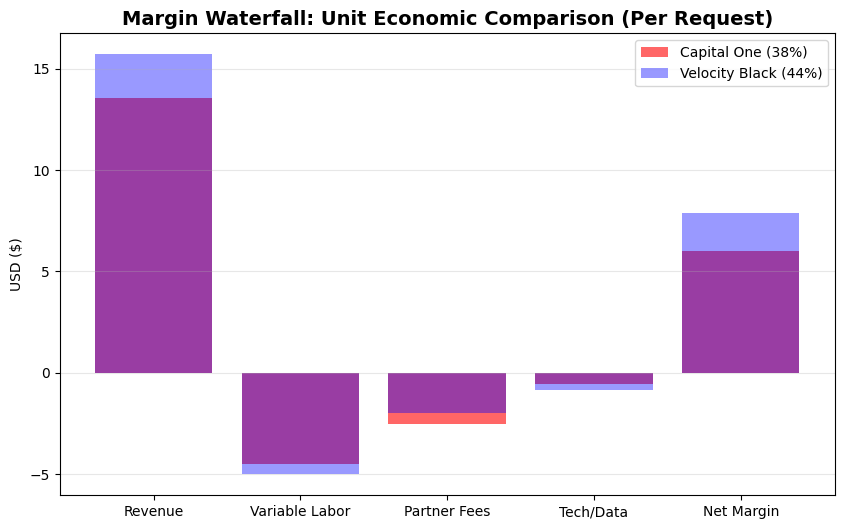

In [3]:
# Synthetic Waterfall Data (VB vs C1)
metrics = ['Revenue', 'Variable Labor', 'Partner Fees', 'Tech/Data', 'Net Margin']
c1_values = [13.53, -4.50, -2.50, -0.53, 6.00]  # Total $6.00 (38%)
vb_values = [15.71, -5.00, -2.00, -0.85, 7.86]  # Total $7.86 (44%)

# Render Visualization
plt.figure(figsize=(10, 6))
plt.bar(metrics, c1_values, label='Capital One (38%)', alpha=0.6, color='red')
plt.bar(metrics, vb_values, label='Velocity Black (44%)', alpha=0.4, color='blue')

plt.title('Margin Waterfall: Unit Economic Comparison (Per Request)', fontsize=14, fontweight='bold')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()